# Laying down some simulation ideas

In [33]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [16]:
# make a random number generator
my_rng = np.random.default_rng(42)

---

## Simulating a soccer game

## Simulating games at the team level

EPL average is 2.65 goals per game 

- simulate a normal random draw at 2.65/2 goals per team
- highest score wins

In [8]:
lvpool = my_rng.normal(1.325)
man_u = my_rng.normal(1.325)

if lvpool > man_u :
    print(f'Liverpool {lvpool} : {man_u} Manchester United - Liverpool wins!')
else :
    print(f'Liverpool {lvpool} : {man_u} Manchester United - Manchester United wins!')

Liverpool 2.265564716391214 : -0.6260351886538364 Manchester United - Liverpool wins!


What's wrong, and how can we improve?

In [10]:
lvpool = my_rng.normal(1.325)
man_u = my_rng.normal(1.325)

# round
lvpool = np.round(lvpool)
man_u = np.round(man_u)

if lvpool > man_u :
    print(f'Liverpool {lvpool} : {man_u} Manchester United - Liverpool wins!')
else :
    print(f'Liverpool {lvpool} : {man_u} Manchester United - Manchester United wins!')

Liverpool 1.0 : 1.0 Manchester United - Manchester United wins!


Now there are ties.

In [43]:
lvpool = my_rng.normal(1.325)
man_u = my_rng.normal(1.325)

# round
lvpool = np.round(lvpool)
man_u = np.round(man_u)

if lvpool > man_u :
    print(f'Liverpool {lvpool} : {man_u} Manchester United - Liverpool wins!')
elif man_u > lvpool :
    print(f'Liverpool {lvpool} : {man_u} Manchester United - Manchester United wins!')
else :
    print(f'It\'s a {lvpool} : {man_u} tie!')

It's a 0.0 : 0.0 tie!


In [45]:
np.round(-0.3)

-0.0

But wait, in a particular year, man_u might have been better: man_u 83/38, liv 77/38

In [58]:
lvpool = my_rng.normal(77/38)
man_u = my_rng.normal(83/38)

# round
lvpool = np.round(lvpool)
man_u = np.round(man_u)

if lvpool > man_u :
    print(f'Liverpool {lvpool} : {man_u} Manchester United - Liverpool wins!')
elif man_u > lvpool :
    print(f'Liverpool {lvpool} : {man_u} Manchester United - Manchester United wins!')
else :
    print(f'It\'s a {lvpool} : {man_u} tie!')

Liverpool 1.0 : 3.0 Manchester United - Manchester United wins!


## Simulating games at the player lever

OOP - simulating using players as objects

In [1]:
import random as rnd

In [2]:
help(rnd.random)

Help on built-in function random:

random() method of random.Random instance
    random() -> x in the interval [0, 1).



OOP - team objects containing players? game objects?

In [ ]:
import random

class Player:
    def __init__(self, name, position, skill):
        self.name = name
        self.position = position
        self.skill = skill

class Team:
    def __init__(self, name, players):
        self.name = name
        self.players = players

    def __str__(self):
        return self.name

class Game:
    def __init__(self, home_team, away_team):
        self.home_team = home_team
        self.away_team = away_team
        self.home_goals = 0
        self.away_goals = 0

    def play(self):
        for i in range(90):
            if random.random() < 0.5:
                scoring_team = self.home_team
                conceding_team = self.away_team
            else:
                scoring_team = self.away_team
                conceding_team = self.home_team

            scorer = random.choice(scoring_team.players)
            scorer.skill += random.randint(1, 3)
            conceder = random.choice(conceding_team.players)
            conceder.skill -= random.randint(1, 3)

            if random.random() < scorer.skill / 100:
                scoring_team_scored = True
                scoring_team_score = 1
                conceding_team_score = 0
            else:
                scoring_team_scored = False
                scoring_team_score = 0
                conceding_team_score = 1

            if scoring_team == self.home_team:
                self.home_goals += scoring_team_score
                self.away_goals += conceding_team_score
            else:
                self.away_goals += scoring_team_score
                self.home_goals += conceding_team_score

        # end for    
        
        #print("Final score: {} {} - {} {}".format(self.home_team, self.home_goals, 
        #                                          self.away_goals, self.away_team))
        
        print(f"Final score: {self.home_team} {self.home_goals} - {self.away_goals} { self.away_team}")
        

    # end play method
    
# Example usage:
player1 = Player("John", "Forward", 80)
player2 = Player("Paul", "Midfielder", 75)
player3 = Player("George", "Defender", 70)
player4 = Player("Ringo", "Goalkeeper", 60)

team1 = Team("Reds", [player1, player2, player3, player4])

player5 = Player("Lennon", "Forward", 85)
player6 = Player("Harrison", "Midfielder", 75)
player7 = Player("McCartney", "Defender", 70)
player8 = Player("Starr", "Goalkeeper", 65)

team2 = Team("Blues", [player5, player6, player7, player8])

game = Game(team1, team2)
game.play()


## Simulating an election

### Simulating based on a single poll

#### *single poll, many elections*

In [ ]:
samp_sz = 2000

In [36]:
poll_ps = np.array([52, 48])
poll_ps = poll_ps / 100

In [37]:
poll_ps

array([0.52, 0.48])

In [30]:
n_voters = 10000 # smallish city - expect around 10k voter turnout
n_sims = 20000   # number of simulations to run

In [38]:
elec_results = my_rng.binomial(n_voters, poll_ps[0], n_sims)

In [39]:
elec_results[0:10]

array([5171, 5251, 5184, 5236, 5190, 5201, 5295, 5178, 5254, 5296])

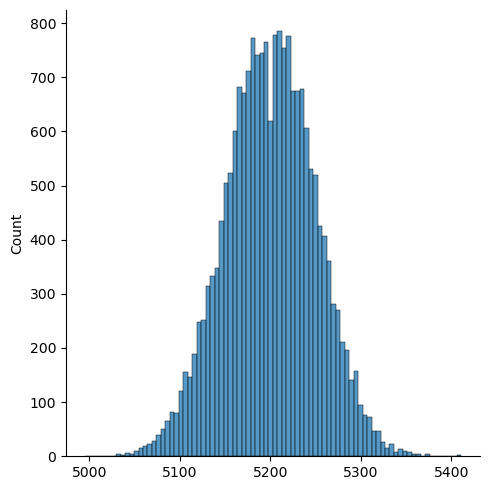

In [40]:
sns.displot(elec_results)

#### *simulate poll -> election cycle*

Notice that we did not encorporate the sample size of the poll and the potential poll-to-poll variability...

In [42]:
samp_sz = 2000
poll_results = my_rng.binomial(samp_sz, poll_ps[0], n_sims)
multi_poll_ps = poll_results/samp_sz

elec_results = my_rng.binomial(n_voters, multi_poll_ps, n_sims)


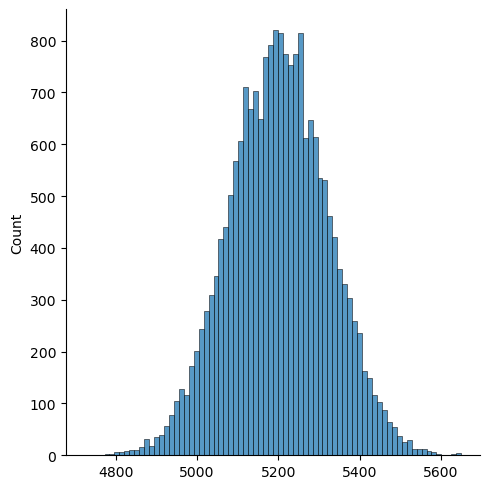

In [43]:
sns.displot(elec_results)